# Budget Analysis

---

## Environment Setup

In [2]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [3]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [4]:
# Set environment variables from the .env file
load_dotenv()

True

In [5]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [6]:
# Create the client object
client= plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


In [7]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [8]:
# Create the public token
create_tkn_response= client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions', 'income', 'assets'])
# Print the public token
create_tkn_response

{'public_token': 'public-sandbox-9bc99f3a-cff7-4b19-a842-b11c28d9e8f3',
 'request_id': 'DaOmCTavuJ23VbZ'}

### 3. Exchange the public token for an access token

In [9]:
# Retrieve the access token
exchange_response=client.Item.public_token.exchange(create_tkn_response['public_token'])
# Print the access toke
exchange_response

{'access_token': 'access-sandbox-c8ad9845-7b4a-42ca-a88a-623acf9ca3a2',
 'item_id': 'R6Go8jbj14fwbMmoeBWLH9ap1XyBvpsRbAmZ1',
 'request_id': 'EkDJ8kSdI0h3FRd'}

In [10]:
# Store the access token in a Python variable
access_token=exchange_response['access_token']

### 4. Fetch Accounts

In [11]:
# Retrieve accounts
response_content= client.Accounts.get(access_token)
# Print accounts
print(response_content)

{'accounts': [{'account_id': '9D6K8yBywgt9jB3PGk6WHJ1gw6xRBniRQnPn8', 'balances': {'available': 100, 'current': 110, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '0000', 'name': 'Plaid Checking', 'official_name': 'Plaid Gold Standard 0% Interest Checking', 'subtype': 'checking', 'type': 'depository'}, {'account_id': 'vylAqeKeR7unz8ovrmawIRArDmEjy7fWkl5lm', 'balances': {'available': 200, 'current': 210, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '1111', 'name': 'Plaid Saving', 'official_name': 'Plaid Silver Standard 0.1% Interest Saving', 'subtype': 'savings', 'type': 'depository'}, {'account_id': 'R6Go8jbj14fwbMmoeBWLH9a1WDd38RSRbJdJE', 'balances': {'available': None, 'current': 1000, 'iso_currency_code': 'USD', 'limit': None, 'unofficial_currency_code': None}, 'mask': '2222', 'name': 'Plaid CD', 'official_name': 'Plaid Bronze Standard 0.2% Interest CD', 'subtype': 'cd', 'type': 'depository'}, {'account

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [12]:
# Set the start and end date 90 days from today
start_date = '{:2020-04-22}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:2020-06-22}'.format(datetime.datetime.now()) 
# Retrieve the transactions for the last 90 days
transaction_response=client.Transactions.get(access_token,start_date,end_date)
# Print the transactions
transaction_response

{'accounts': [{'account_id': '9D6K8yBywgt9jB3PGk6WHJ1gw6xRBniRQnPn8',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'vylAqeKeR7unz8ovrmawIRArDmEjy7fWkl5lm',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'R6Go8jbj14fwbMmoeBWLH9a1WDd38RSRbJdJE',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

### 2. Print the categories for each transaction

In [14]:
# Create a for-loop to print the categories for each transaction
for transactions in transaction_response["transactions"]:
    print(transactions["category"])

['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [118]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
budget_analysis_df=pd.DataFrame()
date=[]
name=[]
amount=[]
category=[]
# Retrieve all the transactions
transaction_response=client.Transactions.get(access_token,start_date,end_date)
# Populate the transactions DataFrame with the transactions data
for transactions in transaction_response["transactions"]:
    date.append(transactions['date'])
    name.append(transactions['name'])
    amount.append(transactions['amount'])
    category.append(transactions['category'][0])
budget_analysis_df["date"]=date
budget_analysis_df["name"]=name
budget_analysis_df["amount"]=amount
budget_analysis_df["category"]=category
# Display sample data from the DataFrame    
budget_analysis_df.head()

,date,name,amount,category
0,2020-06-14,CREDIT CARD 3333 PAYMENT *//,25.0,Payment
1,2020-06-14,Uber 063015 SF**POOL**,5.4,Travel
2,2020-06-13,ACH Electronic CreditGUSTO PAY 123456,5850.0,Transfer
3,2020-06-13,CD DEPOSIT .INITIAL.,1000.0,Transfer
4,2020-06-12,Touchstone Climbing,78.5,Recreation


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [119]:
# Display data types
budget_analysis_df.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [120]:
# Make any required data type transformation
budget_analysis_df = budget_analysis_df.set_index(pd.to_datetime(budget_analysis_df["date"], infer_datetime_format=True)).copy()
budget_analysis_df = budget_analysis_df.sort_index()
budget_analysis_df

,date,name,amount,category
date,,,,
2020-04-24,2020-04-24,Madison Bicycle Shop,500.00,Shops
2020-04-24,2020-04-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-04-24,2020-04-24,KFC,500.00,Food and Drink
2020-04-25,2020-04-25,Tectra Inc,500.00,Food and Drink
2020-04-28,2020-04-28,Uber 072515 SF**POOL**,6.33,Travel
2020-04-30,2020-04-30,United Airlines,500.00,Travel
2020-05-10,2020-05-10,INTRST PYMNT,-4.22,Transfer
2020-05-11,2020-05-11,SparkFun,89.40,Food and Drink
2020-05-12,2020-05-12,Starbucks,4.33,Food and Drink


In [121]:
# Set the date column as index
budget_analysis_df=budget_analysis_df.drop(columns=["date"])
# Display sample data
budget_analysis_df

,name,amount,category
date,,,
2020-04-24,Madison Bicycle Shop,500.00,Shops
2020-04-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-04-24,KFC,500.00,Food and Drink
2020-04-25,Tectra Inc,500.00,Food and Drink
2020-04-28,Uber 072515 SF**POOL**,6.33,Travel
2020-04-30,United Airlines,500.00,Travel
2020-05-10,INTRST PYMNT,-4.22,Transfer
2020-05-11,SparkFun,89.40,Food and Drink
2020-05-12,Starbucks,4.33,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [122]:
# Fetch de income data
start_date2="{:%Y-%m-%d}".format(datetime.datetime.now()+datetime.timedelta(-365))
end_date2="{:%Y-%m-%d}".format(datetime.datetime.now())
# Print the income data
income_response=client.Income.get(access_token)
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'aZgv5vHrkfNaH2Y'}

In [123]:
# Determine the previous year's gross income and print the results
previous_year_gross=income_response["income"]["last_year_income_before_tax"]
print(f'the previous years gross is: {previous_year_gross}')

the previous years gross is: 7285


In [124]:
# Determine the current monthly income and print the results
current_monthly_income=income_response["income"]["income_streams"][0]["monthly_income"]
print(f'the current monthly income is: {current_monthly_income}')

the current monthly income is: 500


In [125]:
# Determine the projected yearly income and print the results
projected_yearly_income=income_response["income"]["projected_yearly_income"]
print(f'the projected yearly income is: {projected_yearly_income}')

the projected yearly income is: 6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [127]:
# Compute the total expenses per category

category_breakdown = budget_analysis_df["category"].value_counts()


# Display the expenses per catefory
category_breakdown

Food and Drink    10
Travel             8
Transfer           6
Payment            4
Shops              2
Recreation         2
Name: category, dtype: int64

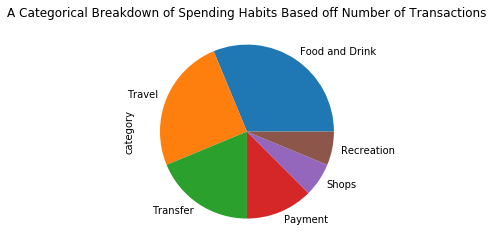

In [128]:
# Create a spending categories pie chart.
category_breakdown.plot(kind="pie",title="A Categorical Breakdown of Spending Habits Based off Number of Transactions",x="Category",y="Number of Transactions")

### Calculate the expenses per month

In [129]:
# Create a DataFrame with the total expenses
budget_analysis_df.head(2)
budget_analysis_df.index
budget_analysis_df["year"]=budget_analysis_df.index.year
budget_analysis_df["month"]=budget_analysis_df.index.month
budget_analysis_df["day"]=budget_analysis_df.index.day
budget_analysis_grp = budget_analysis_df.groupby(["year","month"]).sum()
# Display sample data
budget_analysis_grp

amount  day
year month               
2020 4       4084.83  155
     5      10645.24  284
     6       6560.41  119

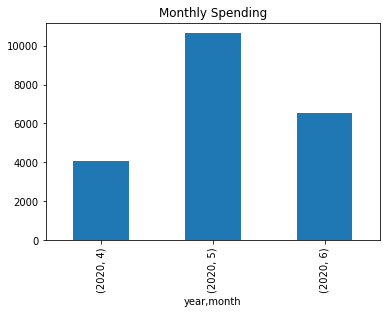

In [133]:
# Create a spending per month bar chart
budget_bar= budget_analysis_grp["amount"].plot(title='Monthly Spending', y= 'amount', kind="bar")

## BUDGET ANALYSIS:

### You had a previous gross income of $7285.

### Your current monthly income is $500.

### Your current gross yearly income is $7389

### Taking home after taxes, $6085 a year.

## After analysizing your expenses, here is a breakdown by category of your expenses:

In [131]:
category_breakdown

Food and Drink    10
Travel             8
Transfer           6
Payment            4
Shops              2
Recreation         2
Name: category, dtype: int64

### The majority of your spending goes towards Food and drink and Travel.

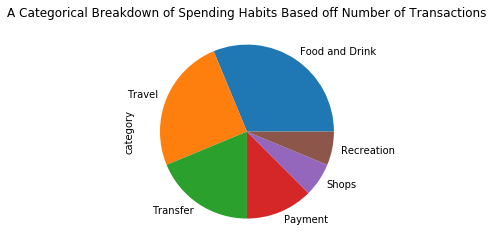

In [132]:
category_breakdown.plot(kind="pie",title="A Categorical Breakdown of Spending Habits Based off Number of Transactions",x="Category",y="Number of Transactions")

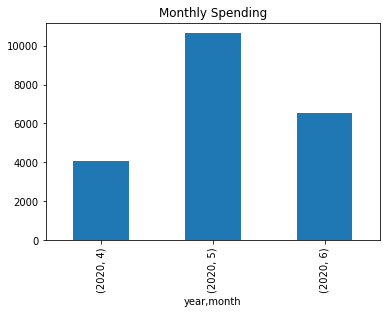

In [135]:
budget_bar= budget_analysis_grp["amount"].plot(title='Monthly Spending', y= 'amount', kind="bar")